## Project: Data Wrangling using Pandas and Regex

In this project you are asked __to implement__ and __perform a unit testing__ for a series of Python functions (Q1-Q13) that are typically required during the ***data wrangling*** phase of the end-to-end data science pipeline. A subset of unit testing functions is provided for you. You are expected to write unit testing for all the remaining functions.

__Data Wrangling consists of the following main steps:__

* Data Acquisition
* Data Cleansing
* Data Understanding: Basics
* Data Manipulation
  
  
__1. Data Acquisition Objectives__

* Question 1: How to import multiples files for storage and access? (store filenames in array)
* Question 2: How to import data in different formats? (read_excel, read_csv)
* Question 2: How are they read into by pandas? (DataFrame)
* Question 4: How to have a peek at the data after import? (head/tail)

__2. Data Cleansing Objectives__

* Question 5: Check attributes of each file
* Question 5: Identify data types
* Question 5: Apply coercion if applicable
* Question 5: Check for NA/missing data
* Question 6: Remove/replace corrupt data
* Question 6: Identify duplicate data
* Question 6: Check for corrupt/incorrect data  

* Check for data consistency (e.g. GPA cannot be less than 0)
* Identifying and removing outliers

__3. Data Understanding Objectives__

* Question 7: Basic Summary Statistics
* Question 9: Dimensionality

__4. Data Manipulation Objectives__

* Question 11: Merge/Concatenate DataFrame
* Question 11: Mapping to create a new attribute
* Question 11: Incorporate the use of multiple functions
* Question 12: Filter to subset the data
* Question 13: Discretize data 
  
  
__Regular Expressions:__ *Regular expressions are used in conjunction with other preprocessing steps for matching/parsing patterns.*

* Questions 2/5/6: Filter to subset the dataUse regular expressions to find/match specific content
* Question 6: Filter to subset the dataString manipulation via. substring and replace methods

## Install Required Packages

If you do not have Anaconda installed, then you may need to install the following packages using the following commands (Note: If you have Anaconda installed, then you already have Pandas and `regex`):

> pip3 install pandas  
  
> pip3 install regex

## INSTRUCTIONS: In all the functions, remove the `pass` statement and write your code.

In [1]:
import pandas as pd
import re
import glob
import copy

%matplotlib inline
import matplotlib.pyplot as plt

### __Question 1: Write a function to import all excel file names into a list.__

_Hint: Use the glob module._

In [2]:
def Q1_function():
    """
    :type : None
    :rtype: List[String]
    """
    # TYPE YOUR CODE HERE
    
    return glob.glob('data_raw/*.xlsx')


# Call the function and print the result. This result is used in subsequent questions.
filenames = Q1_function()
print(filenames)

['data_raw\\Python-QUIZ Coercion (6 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Conditionals (6 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Dictionaries (10 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Exceptions (10 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Functions (18 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Iterations (6 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Lists (10 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Sets (7 min)-grades.xlsx', 'data_raw\\Python-QUIZ Strings (5 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Tuples (10 min.)-grades.xlsx']


### __Question 2: Write a function to return the name of the excel file based on a given string. *(The string is defined for you)*__  
*Hints: Use the following.*
* Regex 're.search' function.
* Pandas function 'read_excel'

In [3]:
def Q2_function(files, s):
    """
    :type : List[String], String
    :rtype: String
    """
    # TYPE YOUR CODE HERE
    match_string = re.compile(s)
    
    #for each file in the list of files, check if the filename matches the given string
    for file in files:
        if match_string.search(file):
            return file

# Call the function and print the result. Use this to check the correctness of your code and for debugging.
file = Q2_function(filenames, s = "Dictionaries")
print(file)

data_raw\Python-QUIZ Dictionaries (10 min.)-grades.xlsx


### __Question 3: Write a function to load the "Functions" excel file into a Pandas DataFrame.__  
*Hint: Remember you have executed functions in Questions 1 and 2. Try using them here. You can save some coding time!*  
* Use the result from Question 1.
* Use the function written in Question 2.
* Use the Pandas function 'read_excel' to import an excel file.

In [4]:
def Q3_function(files, s):
    """
    :type : List[String], String
    :rtype: Pandas DataFrame
    """
    # TYPE YOUR CODE HERE
    #using solution to Q2, we find the filename corresponding to the given string
    file = Q2_function(files,s)
    
    #read the data into a dataframe and return the same
    functions_data = pd.read_excel(file)
    return functions_data


# Call the function and print the result. This result is used in subsequent questions.
functions_df = Q3_function(filenames, s = "Functions")
print(functions_df)
# functions_df.head(3)

       State                  Started on                   Completed  \
0   Finished    February 5 2018  3:19 PM    February 5 2018  3:34 PM   
1   Finished    February 4 2018  4:01 PM    February 4 2018  4:19 PM   
12  Finished    February 6 2018  3:57 PM    February 6 2018  4:12 PM   
2   Finished   February 10 2018  4:05 PM   February 10 2018  4:23 PM   
3   Finished    February 4 2018  4:59 PM    February 4 2018  5:16 PM   
4   Finished    February 5 2018  5:20 PM    February 5 2018  5:38 PM   
5   Finished   February 10 2018  9:49 PM  February 10 2018  10:07 PM   
6   Finished    February 5 2018  8:30 PM    February 5 2018  8:48 PM   
7   Finished   February 13 2018  4:17 AM   February 13 2018  4:35 AM   
8   Finished   February 12 2018  2:19 PM   February 12 2018  2:35 PM   
9   Finished  February 13 2018  10:45 AM  February 13 2018  11:03 AM   
10  Finished   February 11 2018  1:48 AM   February 11 2018  2:06 AM   
4   Finished    February 5 2018  5:20 PM    February 5 2018  5:3

### __Question 4: Using the output obtained in Question 3 as input for the current question, write a function to do the following.__  
* Find all the names of the columns and return as a list.
* Find the subset of the DataFrame (use `df.loc`) and return the new DataFrame. Include the following columns:   
_"id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"_
* Return the top 10 rows (use `df.head function`).

Learn about returning multiple values in Python.

In [5]:
def Q4_function(dataframe):
    """
    :type : DataFrame
    :rtype: [String], DataFrame, DataFrame
    """
    # TYPE YOUR CODE HERE
    
    #convert the names of all columns into a list
    col_list = list(dataframe.columns)
    
    #find the subset of df that include the given columns
    subset = dataframe.loc[:, ["id","Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]]
    
    #extract only the top 10 rows
    top_rows = dataframe.head(10)
    
    return col_list,subset,top_rows


# Call the function and print the results. These results are used in subsequent questions.
names, df_subset, top_10 = Q4_function(functions_df)

print("Column Names")
print(names)
print()
print("Subsetted Data")
print(df_subset)
print()
print("Top 10 Rows")
print(top_10)

Column Names
['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00', 'id']

Subsetted Data
    id       Time taken  Grade/45.00  Q. 1 /5.00  Q. 2 /10.00  Q. 3 /6.00  \
0    0  14 mins 16 secs           32           5            6           6   
1    1  17 mins 54 secs           31           5            8           6   
12  12  15 mins 44 secs           20           3            4           3   
2    2          18 mins           30           5            6           6   
3    3  17 mins 31 secs           26           5            6           6   
4    4  17 mins 59 secs           25           5            6           6   
5    5          18 mins           24           5            6           6   
6    6          18 mins           23           5            6           0   
7    7    18 mins 1 sec           23           4            4           6   
8    8  16 mins 44 secs           22       

### Question 5: Using the subsetted DataFrame from the previous question, complete the following tasks.

* Identify the data type of every column. Return as a list. *(read about dtypes)*
* Strip all white spaces from the columns. 
    + try using list comprehension along with the 'sub' function in 're' module
* Check if 'Time taken' column has NA or empty values:
    + use `df.isnull().any()`. 
    + If YES, replace with 0: use `df.fillna()`.
* Using `regex` (`re.search`), convert the 'Time taken' column into seconds (int) and store in a new column called 'time' (e.g., convert __2 mins 10 secs__ into __130__. Note that to get 130, you need to do some math. Use coersion to convert str to int.
* Return the DataFrame with 'Time taken' column dropped.

In [6]:
def Q5_function(df):
    
    """
    :type : DataFrame
    :rtype: [String], DataFrame
    """
    # TYPE YOUR CODE HERE
    
    
    #strip all the whitespaces in the column names
    stripped_col = [ re.sub(r'\s','',col) for col in df.columns]
    df.columns = stripped_col  
    
    #replace NA values in Time taken with 0
    if df['Timetaken'].isnull().any():
        df['Timetaken'] = df['Timetaken'].fillna(0)
    
    #check for the string that matches 'mins' and 'secs' using python regexp and convert the value into total seconds
    seconds_col = []
    for value in df['Timetaken']:
        min_pattern = re.compile(r'(\d+)\smins?')
        sec_pattern = re.compile(r'(\d+)\ssecs?')
        mins = min_pattern.search(value)
        secs = sec_pattern.search(value)

        if secs:
            total = int(mins.group(1))*60 + int(secs.group(1))
            seconds_col.append(total)
        else:
            total = int(mins.group(1))*60
            seconds_col.append(total)
    
    #drop the Time taken column
    new_df_res = df.drop('Timetaken',axis=1)
    
    #add a new time column with the calculated time in seconds
    new_df_res['time'] = seconds_col
    
    
    return list(new_df_res.dtypes),new_df_res
        
        
# Call the function and print the results. These results are used in subsequent questions.
column_types, Q5_df = Q5_function(df_subset)
print("Column Datatypes")
print(column_types)
print()
print("New Update DataFrame")
print(Q5_df)

Column Datatypes
[dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('int64')]

New Update DataFrame
    id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00 Q.4/6.00 Q.5/12.00  \
0    0           32         5          6         6     3.00     12.00   
1    1           31         5          8         6        -     12.00   
12  12           20         3          4         3        -     10.00   
2    2           30         5          6         6     3.00     10.00   
3    3           26         5          6         6     3.00      6.00   
4    4           25         5          6         6     6.00      2.00   
5    5           24         5          6         6     3.00      4.00   
6    6           23         5          6         0     0.00      6.00   
7    7           23         4          4         6     3.00      6.00   
8    8           22         4          4         6     0.00      8.00   
9    9           22      

### Question 6: Using the returned DataFrame from the previous question, complete the following tasks.

* Some columns might need to be converted to integer for the subsequent tasks. Identify which columns and convert them to int/float.
* Are there any duplicate rows? Remove them from the DataFrame.
* Data collected might be corrupt. Check whether data is missing or corrupt. Data is missing if there is a '-'. If missing data exists, replace with the mean of other values.
* With the above point in mind, find the mean values of all columns except 'id'. Append these as a row to your dataframe and return

*Hint: Note that the maximum marks for each column is different. Make sure you parse the information from the column name.*

In [7]:
def Q6_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """
    # TYPE YOUR CODE HERE
    
    #convert the values to float
    for col in df.columns:
            df.loc[:,col] = pd.to_numeric(df.loc[:,col], errors = 'coerce')
    
    #remove duplicates from the dataframe if any
    df = df.drop_duplicates()
    
    #create a list of all the means of respective columns
    mean_list = [df.loc[:,col].mean() for col in df.columns[1:]]
    
    #replace the NA values in each column with its respective mean
    for col in df.columns[1:]:
        df.loc[:,col] = df.loc[:,col].fillna(df.loc[:,col].mean())
    
    #add a new row that contains the average of respective columns
    df.loc[max(df['id'])+1,df.columns[1:]] = mean_list
    
    return df

Q6_df = Q6_function(Q5_df)
print(Q6_df)

C:\Users\rutvik\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


      id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00  Q.4/6.00  Q.5/12.00  \
0    0.0    32.000000  5.000000   6.000000  6.000000       3.0      12.00   
1    1.0    31.000000  5.000000   8.000000  6.000000       2.0      12.00   
12  12.0    20.000000  3.000000   4.000000  3.000000       2.0      10.00   
2    2.0    30.000000  5.000000   6.000000  6.000000       3.0      10.00   
3    3.0    26.000000  5.000000   6.000000  6.000000       3.0       6.00   
4    4.0    25.000000  5.000000   6.000000  6.000000       6.0       2.00   
5    5.0    24.000000  5.000000   6.000000  6.000000       3.0       4.00   
6    6.0    23.000000  5.000000   6.000000  0.000000       0.0       6.00   
7    7.0    23.000000  4.000000   4.000000  6.000000       3.0       6.00   
8    8.0    22.000000  4.000000   4.000000  6.000000       0.0       8.00   
9    9.0    22.000000  5.000000   8.000000  6.000000       3.0       5.75   
10  10.0    21.000000  5.000000  10.000000  6.000000       2.0       5.75   

C:\Users\rutvik\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Question 7: Use previously created functions to load the 'Exceptions' dataset as a dataframe

* Calculate the mean of the total grade obtained by the students.
* Calculate the standard deviation of the total grade obtained by the students.
* Calculate Q1,Q2 and Q3 (quantiles) for the total grade.
* Find the maximum and minimum values for the total grade

* Return all values rounded to 2 decimal places

*Hint: Use the df.describe function*

In [8]:
def Q7_function(file):
    """
    :type : String
    :rtype: Float
    """
    # TYPE YOUR CODE HERE
    
    #use solution to Q3 to load the exceptions data into a dataframe
    excep_df = Q3_function(filenames,file)
    
    #extract the required values by converting the output of describe into a list and rounding it to 2 decimal places
    mean = round(list(excep_df['Grade/21.00'].describe())[1],2)
    std = round(list(excep_df['Grade/21.00'].describe())[2],2)
    q1 = round(list(excep_df['Grade/21.00'].describe())[4],2)
    q2 = round(list(excep_df['Grade/21.00'].describe())[5],2)
    q3 = round(list(excep_df['Grade/21.00'].describe())[6],2)
    maximum = round(list(excep_df['Grade/21.00'].describe())[7],2)
    minimum = round(list(excep_df['Grade/21.00'].describe())[3],2)
    
    return mean, std, q1, q2, q3, maximum, minimum
    

# Call the function and print the results.
mean_,std_,q1,q2,q3,max_,min_ = Q7_function(file="Exceptions")
print("Mean:", mean_)
print("Std. Dev.:", std_)
print("First Quantile", q1)
print("Second Quantile", q2)
print("Third Quantile", q3)
print("Max:", max_)
print("Min:", min_)

Mean: 14.83
Std. Dev.: 2.19
First Quantile 13.46
Second Quantile 14.66
Third Quantile 16.62
Max: 18.5
Min: 10.83


### Question 8: Create a boxplot of the grade distribution in the 'Exceptions' dataset.

* Compare the plot lines to the values calculated in the previous question.
* Use df.plot.box function.

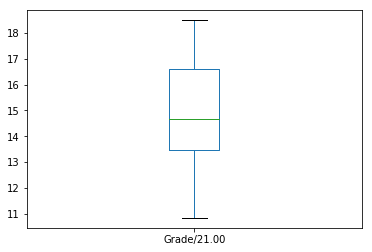

In [9]:
def Q8_function(file):
    
    """
    :type : String
    :rtype: Plot
    """
    
    df = Q3_function(filenames, file)
    Q8_plot = df[['Grade/21.00']].plot.box(return_type='axes')
    
    return Q8_plot


# Call the function. Plot will display.
Q8_function(file='Exceptions')

### Question 9: Return the number of rows and columns present in the 'Strings' dataset

* Use the `df.shape` attribute.

In [10]:
def Q9_function(file):
    
    """
    :type : String
    :rtype: list
    """ 
    # TYPE YOUR CODE HERE
    
    strings_df = Q3_function(filenames, file)
    
    row = strings_df.shape[0]
    col = strings_df.shape[1]
    
    return row,col


# Call the function and print the results
rows, columns = Q9_function (file='Strings')
print("Rows:",rows)
print("Columns:",columns)

Rows: 17
Columns: 7


### Question 10: Use the output from Question 5. Group the students based on their score in 'Q. 5 /12.00' column

* Which students scored 0 
* How many students achieved the maximum possible score
* Consider NA/missing values as 0

*Hint : Use groupby function.*


In [11]:
def Q10_function(df):
    
    """
    :type : DataFrame
    :rtype: list, int
    """ 
    # TYPE YOUR CODE HERE
    
    #replace NA values in the given column with 0
    df['Q.5/12.00'] = df['Q.5/12.00'].fillna(0)
    
    #group the students based on marks obtained in this particular question
    grouped_students = df.groupby('Q.5/12.00')
    
    #extract the minimum and maximum possible score using the get_group() function
    min_scores = list(grouped_students['id'].get_group(0))
    max_scores = len((grouped_students['id'].get_group(12)))
    
    return min_scores, max_scores
# Call the function and print the results
zero, maximum = Q10_function(Q5_df)
print("Students scoring zero :",zero)
print("Number of students with maximum score :",maximum)

Students scoring zero : [9, 10, 13, 17, 18]
Number of students with maximum score : 2


### Question 11: Find out who ('id') has scored the maximum combined score in the 'Tuples' and 'Taxonomy' quiz.

* Use the `pd.merge()` function.
* Call the function you wrote for Question 5 to convert time and remove spaces in columns (will be used in later questions).
* Create a new column 'Total_score' which is the sum of the scores of the two quizzes.

In [12]:
def Q11_function():
    
    """
    :type : None
    :rtype: Dataframe, int
    """ 
    # TYPE YOUR CODE HERE
    
    #load the given data files into dataframes
    tuples_df_old = Q3_function(filenames, 'Tuples')
    tax_df_old = Q3_function(filenames, 'Taxonomy')
    
    #convert the time into seconds
    tuples_col, tuples_df = Q5_function(tuples_df_old)
    tax_col, tax_df = Q5_function(tax_df_old)
    
    #add the two columns using the merge function
    new_df = tuples_df.merge(tax_df,on='id')
    new_df['Total_score'] = new_df['Grade/20.00'] + new_df['Grade/21.00']
    
    max_score = int(new_df[new_df['Total_score']==max(new_df['Total_score'])]['id'])
    return new_df, max_score

# Call the function and print the results. The DataFrame will be used in subsequent questions
Q11_df,max_scorer = Q11_function()
print("Max scorer :",max_scorer)

Max scorer : 10


### Question 12: Use the DataFrame generated in Question 11 and return the list of ids whose total time for both quizzes is less than than 20 minutes.

* Sort the list before returning.
* Can you code it in one line?

In [13]:
def Q12_function(df):
    
    """
    :type : DataFrame
    :rtype: list(int)
    """ 
    # TYPE YOUR CODE HERE  
    
    #for each record,we check if the sum of times for quiz1 and quiz2 are less than 20 mins, if yes add the id to the result list
    return sorted([df['id'].iloc[i] for i in range(len(df['id'])) if df['time_x'].iloc[i]+df['time_y'].iloc[i] < 1200])

# Call the function and print the results.
ids = Q12_function(Q11_df)
print("ID of students :",ids)

ID of students : [3, 4, 7, 8, 12, 18]


### Question 13: Discretize the column 'Grade/45.00' for the DataFrame generated in Question 6 and create a new column. Find the number of people (id) per bin. Return a DataFrame with only the bins and count per bin.

*Hints:* 
* _Use 'cut' and 'groupby'._
* _Include the overall average in the groupings._
* _You won't need to use 'drop' to drop columns. Use groupby and check the result._
* _Use 5 bins_
* Don't consider 'Overall Average' row.

In [14]:
def Q13_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """    
    # TYPE YOUR CODE HERE
    
    #slice the original dataframe so as to not consider overall average
    sliced_df = df.loc[0:18,'Grade/45.00'] 
    
    #dividethe column into 5 bins
    bin_groups = sliced_df.groupby(pd.cut(sliced_df,5)).groups   
    
    #extract the particular value of student ids from the groups
    i=0
    group_list=[]
    for values in bin_groups.values():
        group_list.append(list(list(bin_groups.values())[i]))
        i+=1
    
    #convert the list into series
    group_series = pd.Series(group_list)
    
#     calculate the count for each bin
#     size_list = [len(val) for val in group_list]
#     size_series = pd.Series(size_list)
    
    return group_series
    

# Call the function and print the results.
Q13_df = Q13_function(Q6_df)
print(Q13_df)

0           [15, 16, 17, 18]
1               [12, 13, 14]
2    [5, 6, 7, 8, 9, 10, 11]
3                     [3, 4]
4                  [0, 1, 2]
dtype: object


### INSTRUCTIONS: Complete unit testing for the remaining functions to check correctness of your code.

In [15]:
import unittest
import numpy as np

class TestNotebook(unittest.TestCase):

    def test_Q01_function(self):
        ans = ['Python-QUIZ Coercion (6 min.)-grades.xlsx', 'Python-QUIZ Conditionals (6 min.)-grades.xlsx', 'Python-QUIZ Dictionaries (10 min.)-grades.xlsx', 'Python-QUIZ Exceptions (10 min.)-grades.xlsx', 'Python-QUIZ Functions (18 min.)-grades.xlsx', 'Python-QUIZ Iterations (6 min.)-grades.xlsx', 'Python-QUIZ Lists (10 min.)-grades.xlsx', 'Python-QUIZ Sets (7 min)-grades.xlsx', 'Python-QUIZ Strings (5 min.)-grades.xlsx', 'Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', 'Python-QUIZ Tuples (10 min.)-grades.xlsx']
        
        result=Q1_function()
        for filename in ans:
            self.assertTrue(filename.split("\\")[-1] in ans)
        
    def test_Q02_function(self):
        
        ans='Python-QUIZ Lists (10 min.)-grades.xlsx'
        
        result=Q2_function(filenames, s = "Lists")
        
        #Handling removal of the path to check only filename
        self.assertEqual(ans,result.split("/")[-1].split("\\")[-1])

    def test_Q03_function(self):
        ans_df = pd.read_excel('data_raw/Python-QUIZ Lists (10 min.)-grades.xlsx')
        
        result = Q3_function(filenames, s = "Lists")
        
        self.assertTrue(result.equals(ans_df))
        
        
    def test_Q04_function(self):
        
        cols_ans=['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00',  'id']
        subset_cols_ans= ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]
        top_ans=10
        
        cols_result,subset_result,top_result=Q4_function(functions_df)

        self.assertEqual(cols_ans,list(cols_result))
        self.assertEqual(subset_cols_ans,list(subset_result.columns))
        self.assertEqual(top_ans,len(top_result))
        
    def test_Q05_function(self):
        stripped_cols=['id', 'Grade/45.00', 'Q.1/5.00', 'Q.2/10.00', 'Q.3/6.00', 'Q.4/6.00', 'Q.5/12.00', 'Q.6/6.00', 'time']
        time_ans = [856, 1074, 944, 1080, 1051, 1079, 1080, 1080, 1081, 1004, 1081, 1080, 1079, 1080, 779, 944, 1081, 1080, 1081, 1080, 2919, 1081, 871, 1004]
        col_type =[np.dtype('int64'), np.dtype('int64'), np.dtype('int64'), np.dtype('int64'), np.dtype('int64'), np.dtype('O'), np.dtype('O'), np.dtype('O'), np.dtype('int64')]
        res_types, res_df = Q5_function(df_subset)

        #check if column type is correct
        self.assertEqual(col_type,res_types)
        
        #check if the time column is calculated correctly
        self.assertEqual(time_ans, list(res_df['time']))
        
        #check for no presence of stripped whitespace
        self.assertEqual(stripped_cols,list(res_df.columns))
            
    def test_Q06_function(self):
        q4 = [3.0, 2.0, 2.0, 3.0, 3.0, 6.0, 3.0, 0.0, 3.0, 0.0, 3.0, 2.0, 0.0, 3.0, 3.0, 0.0, 0.0, 2.0, 0.0, 2.0]
        q5 = [12.0, 12.0, 10.0, 10.0, 6.0, 2.0, 4.0, 6.0, 6.0, 8.0, 0.0, 0.0, 4.0, 0.0, 2.0, 4.0, 6.0, 0.0, 0.0, 4.842105263157895]
        q6 = [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 6.0, 0.0, 0.0, 1.0, 1.0, 6.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]
        
        res_df = Q6_function(Q5_df)
        
        #check if the missing values have been replaced by means
        self.assertEqual(q4, list(res_df['Q.4/6.00']))
        self.assertEqual(q5, list(res_df['Q.5/12.00']))
        self.assertEqual(q6, list(res_df['Q.6/6.00']))
        
    def test_Q07_function(self):
        
        ans=(14.83,2.19,13.46,14.66,16.62,18.5,10.83) 
        result=Q7_function(file="Exceptions")
        self.assertEqual(ans, result)

    def test_Q08_function(self):
        pass
    
    def test_Q09_function(self):
        row, col = Q9_function(file='Strings')
        self.assertEqual(row,17)
        self.assertEqual(col,7)
    
    def test_Q10_function(self):
        zero_id = [9, 10, 13, 17, 18]
        max_number = 2
        
        res_ids, res_max = Q10_function(Q5_df)
        
        self.assertEqual(max_number,res_max)
        self.assertEqual(zero_id,res_ids)
    
    def test_Q11_function(self):
        total_score_df = [32, 39, 37, 37, 41, 39, 38, 39, 37, 33, 27, 32, 31, 24]
        max_id = 10
        ans_df,max_scorer = Q11_function()
        
        #check if the total_score column has correct values
        self.assertEqual(total_score_df, list(ans_df['Total_score']))
        
        #check if the reutrned id is correct
        self.assertEqual(max_id,max_scorer)
       
    def test_Q12_function(self):
        ans=[3, 4, 7, 8, 12, 18]   
        result=Q12_function(Q11_df)
        self.assertEqual(ans, result)
        
    def test_Q13_function(self):
        ans = [[15, 16, 17, 18], [12, 13, 14], [5, 6, 7, 8, 9, 10, 11], [3, 4], [0, 1, 2]]
        temp = Q13_function(Q6_df)
        result = [temp.iloc[x] for x in range(len(temp))]
        
        for x in range(len(ans)):
            self.assertEqual(sum(result[x]), sum(ans[x]))

        
unittest.main(argv=[''], verbosity=2, exit=False)

test_Q01_function (__main__.TestNotebook) ... ok
test_Q02_function (__main__.TestNotebook) ... ok
test_Q03_function (__main__.TestNotebook) ... C:\Users\rutvik\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\rutvik\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\rutvik\Anaconda3\lib\site-packages\xlrd\xlsx.py:312: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
ok
test_Q04_function (__main__.TestNotebook) ... ok
test_Q05_function (__main__.TestNotebook) ... ok
test_Q06_function (__mai